# Project - Data Wrangling

## <font color='blue'>Data Gathering</font>


In [552]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import requests
import tweepy

### 1. Download the data manually and load the data into a DataFrame

In [553]:
# download the data from the web and 
# load the data into a dataframe
df = pd.read_csv('twitter-archive-enhanced.csv')

In [554]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Make a http request and extract the content from the response

In [555]:
# make a request
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

In [556]:
# check the status code
r.status_code

200

In [557]:
# check the content type and encoding
r.headers['Content-type']

'text/tab-separated-values; charset=utf-8'

In [558]:
# parse the response into a list
data = []
for row in r.text.split('\n'):
    data.append(row.split('\t'))

In [559]:
# take a look
data[:2]

[['tweet_id',
  'jpg_url',
  'img_num',
  'p1',
  'p1_conf',
  'p1_dog',
  'p2',
  'p2_conf',
  'p2_dog',
  'p3',
  'p3_conf',
  'p3_dog'],
 ['666020888022790149',
  'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
  '1',
  'Welsh_springer_spaniel',
  '0.465074',
  'True',
  'collie',
  '0.156665',
  'True',
  'Shetland_sheepdog',
  '0.0614285',
  'True']]

In [560]:
# make a DataFrame from the list
# the column label is the first element of the list
df_image = pd.DataFrame(data[1:], columns=data[0])

In [561]:
# check the result
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [562]:
# save to a local file
df_image.to_csv('df_image.csv', index=False)

### 3. Request Tweeter API using Tweepy

In [563]:
# set up the authentication keys

# consumer_key = ""
# consumer_secret = ""
# access_token = ""
# access_token_secret = ""

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)



In [564]:
# query Twitter's API for each tweet ID
# save each tweet's returned JSON as a new line in the tweet_json.txt file

# import time

# count = 0                     # initialize a counting
# fails_dict = {}               # record the failed request in a dict
# start = time.time()           # record the starting process time

# with open('tweet_json.txt', 'w') as outfile:
#     for id in df.tweet_id.values:        
#         count += 1
#         print(str(count) + ': ' + str(id))    # print the count
#         try:
#             status = api.get_status(id, tweet_mode='extended')     # request the API 
#             json.dump(status._json, outfile)      # append the python dictionary to the outfile
#             outfile.write('\n')                   # add a newline character at the end
#             print('Success')
#         except tweepy.TweepError as e:
#             print('Fail')    
#             fails_dict[id] = e                     # add the error into the dictionary
#             pass
# end = time.time()                        # record the ending process time
# print('time elapsed: ', end - start)     # calculate the total elapsed time


In [565]:
# extract retweet_counts and favorite_count given a json file 
def get_counts(file):
    df_list = []    # list of dictionary to build and convert to a DataFrame later
    with open(file) as json_files:
        for json_str in json_files:
            tweet = json.loads(json_str)   # deserialize each json string
    #         print(json.dumps(tweet, indent=2, sort_keys=True)) 
    #         break

            # extract the information we want
            tweet_id = tweet['id_str']
            favorite_count = tweet['favorite_count']
            retweet_count = tweet['retweet_count']

            # append the dict into a list
            df_list.append( {'tweet_id': tweet_id,
                             'favorite_count': favorite_count,
                             'retweet_count': retweet_count} )
    return df_list

In [566]:
# call the function
df_list = get_counts('tweet_json.txt')

In [567]:
# take a look
df_list[:5]

[{'tweet_id': '892420643555336193',
  'favorite_count': 34709,
  'retweet_count': 7248},
 {'tweet_id': '892177421306343426',
  'favorite_count': 30071,
  'retweet_count': 5429},
 {'tweet_id': '891815181378084864',
  'favorite_count': 22631,
  'retweet_count': 3583},
 {'tweet_id': '891689557279858688',
  'favorite_count': 37979,
  'retweet_count': 7457},
 {'tweet_id': '891327558926688256',
  'favorite_count': 36261,
  'retweet_count': 8007}]

In [568]:
# create a DataFrame from the list of dictionaries
df_count = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

In [569]:
# check the info
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [570]:
# take a look
df_count.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,34709,7248
1,892177421306343426,30071,5429
2,891815181378084864,22631,3583
3,891689557279858688,37979,7457
4,891327558926688256,36261,8007


In [571]:
df_count.tail()

,tweet_id,favorite_count,retweet_count
2326,666049248165822465,92,37
2327,666044226329800704,255,119
2328,666033412701032449,105,38
2329,666029285002620928,117,41
2330,666020888022790149,2328,439


In [572]:
df_count.shape

(2331, 3)

In [573]:
# save df_count to a local file
df_count.to_csv('df_count.csv', index=False)

In [574]:
# also convert the fails_dict to a dataframe
# df_fails = pd.DataFrame(list(fails_dict.items()), columns=['id', 'error_message'])

In [575]:
# and save df_fails to a local .csv file
# df_fails.to_csv('df_fails.csv', index=False)

## <font color='blue'>Data Assessing</font>

### Visual Assessment

In [576]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [577]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17027799999999998,False,Labrador_retriever,0.16808599999999999,True,spatula,0.0408359,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.0313789,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.0906465,True,papillon,0.0689569,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.09704860000000001,False,bagel,0.08585110000000001,False,banana,0.07611,False


In [578]:
df_count

,tweet_id,favorite_count,retweet_count
0,892420643555336193,34709,7248
1,892177421306343426,30071,5429
2,891815181378084864,22631,3583
3,891689557279858688,37979,7457
4,891327558926688256,36261,8007
...,...,...,...
2326,666049248165822465,92,37
2327,666044226329800704,255,119
2328,666033412701032449,105,38
2329,666029285002620928,117,41


### Programmatic Assessment

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [580]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2076 non-null   object
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   object
 3   p1        2075 non-null   object
 4   p1_conf   2075 non-null   object
 5   p1_dog    2075 non-null   object
 6   p2        2075 non-null   object
 7   p2_conf   2075 non-null   object
 8   p2_dog    2075 non-null   object
 9   p3        2075 non-null   object
 10  p3_conf   2075 non-null   object
 11  p3_dog    2075 non-null   object
dtypes: object(12)
memory usage: 194.8+ KB


In [581]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [582]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [583]:
df_image.isnull().sum()

tweet_id    0
jpg_url     1
img_num     1
p1          1
p1_conf     1
p1_dog      1
p2          1
p2_conf     1
p2_dog      1
p3          1
p3_conf     1
p3_dog      1
dtype: int64

In [584]:
df_count.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [585]:
df.duplicated().sum()

0

In [586]:
df_image.duplicated().sum()

0

In [587]:
df_count.duplicated().sum()

0

In [588]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [589]:
df_image.describe()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2076,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075
unique,2076,2009,4,378,2006,2,405,2004,2,408,2006,2
top,,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,1,golden_retriever,0.253442,True,Labrador_retriever,0.0693617,True,Labrador_retriever,0.0716476,True
freq,1,2,1780,150,2,1532,104,3,1553,79,2,1499


In [590]:
df_count.describe()

,favorite_count,retweet_count
count,2331.000000,2331.000000
mean,7247.244959,2556.616903
std,11257.022513,4324.572442
min,0.000000,1.000000
25%,1256.500000,518.500000
50%,3138.000000,1189.000000
75%,8856.500000,2966.000000
max,148987.000000,73289.000000


In [591]:
df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Acro         1
Tiger        1
Cheesy       1
Caryl        1
Willow       1
Name: name, Length: 957, dtype: int64

In [592]:
df_image.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
bee_eater               1
syringe                 1
panpipe                 1
conch                   1
envelope                1
Name: p1, Length: 378, dtype: int64

In [593]:
df_image.tweet_id.duplicated().sum()

0

In [594]:
df_count.tweet_id.duplicated().sum()

0

In [595]:
# urls with html tags
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## <span style='color:Blue'>Quality Issues</span>

##### `df` table

- Missing values in df's columns (`in_reply_to_status_id`, `in_reply_to_user_id`,  `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `name`, `expanded_urls`)
- Multivalue in df's `expanded_urls` column
- Doggo, floofer, pupper, puppo have values None, and of type object
- df's `source` column has values mixed with html tags
- The type of df's `timestamp` column is object
- The type of `tweet_id` in df is integer
- df's `name` column has 55 dog's name *a* and several *None* values
- There are some tweeter ids that we cannot retrieve information from Tweeter

##### `df_image` table

- df_image's last row is an "empty" row
- The columns `img_num`, `p1_conf`, `p2_conf`, `p3_conf` are of type object and in inconsistent format
- The format of df's `name`, df_image's `p1`, `p2`, and `p3` are inconsistent, some lower-case some capitalized. And they should be of type category
- df_image's `p1_dog`, `p2_dog`, and `p3_dog` are of type object, which should be of type boolean
- Some records in `df_image` do not exist in `df`

##### `df_count` table
- Some records in this table do not exist in `df` table, or `df_image` table


## <span style='color:Blue'>Tidiness Issues</span>

- One variable (stage) in four columns (Doggo, floofer,	pupper,	puppo). Column headers should be values, not column names. And the stage should be of type category
- There should be 1 observational units in this dataset other than 3 units (3 tables). df_count and df_image should be merged with df table


## <span style='color:Blue'>Data Cleaning</span>

### 1. Missing values and some quality issues

In [596]:
# load the dataset if needed
df = pd.read_csv('twitter-archive-enhanced.csv', dtype={'tweet_id': 'object'})
df_image = pd.read_csv('df_image.csv', dtype={
    'tweet_id': 'object', 'p1_conf':'float', 'p2_conf':'float', 'p3_conf':'float',
    'p1_dog':'boolean', 'p2_dog':'boolean', 'p3_dog':'boolean'})
df_count = pd.read_csv('df_count.csv', dtype={'tweet_id': 'object'})

In [597]:
# reload the dataframe and convert it back to fails_dict 
# without re-runing the request to tweeter API

df_fails = pd.read_csv('df_fails.csv')
fails_dict = df_fails.set_index('id').T.to_dict()

In [598]:
# make a copy of original dataframes
df_clean = df.copy()
df_image_clean = df_image.copy()
df_count_clean = df_count.copy()

##### Define

- doggo, floofer, pupper, puppo have values None, and of type object
- name have several *None* values

##### Code

Replace all the *None* values with np.nan values

In [599]:
# replace None to NaN
df_clean.replace('None', np.nan, inplace=True)

##### Test

In [600]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [601]:
# no more None values
df_clean.doggo.value_counts()

doggo    97
Name: doggo, dtype: int64

In [602]:
# no more None values
df_clean.floofer.value_counts()

floofer    10
Name: floofer, dtype: int64

In [603]:
# None of columns contains any None now
mask = np.column_stack(
    [df_clean[col].str.contains(r"None", na=False) \
                       for col in df_clean[['doggo', 'floofer', 'pupper', 'puppo']]])
mask.any(axis=0)

array([False, False, False, False])

In [604]:
# And also no more None values in column name
(df_clean.name == 'None').sum()

0

##### Define

- df_image's last row is an "empty" row
- Multivalue and missing values in df's `expanded_urls` column
- Missing values in df's columns (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)



##### Code

* Drop the last row of df_image
* Replace the multivalue with single-valued content
* Drop columns that are not used (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

In [605]:
# drop the last row of df_image table
df_image_clean.drop(index=[2075], inplace=True)

In [606]:
# replace all value of column expanded_urls with single-valued content
df_clean.expanded_urls = \
['https://twitter.com/dog_rates/status/' + str(id_num) + '/photo/1' \
        for id_num in df_clean.tweet_id]

In [607]:
# drop the columns 
df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
                       'retweeted_status_id', 'retweeted_status_user_id', 
                       'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [608]:
# no more null values in df_image
df_image_clean.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [609]:
# now the urls are single-valued
df_clean.expanded_urls.values

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666020888022790149/photo/1'],
      dtype=object)

In [610]:
df_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/806620845233815552/photo/1    1
https://twitter.com/dog_rates/status/692158366030913536/photo/1    1
https://twitter.com/dog_rates/status/841077006473256960/photo/1    1
https://twitter.com/dog_rates/status/819924195358416896/photo/1    1
https://twitter.com/dog_rates/status/820749716845686786/photo/1    1
                                                                  ..
https://twitter.com/dog_rates/status/720415127506415616/photo/1    1
https://twitter.com/dog_rates/status/679736210798047232/photo/1    1
https://twitter.com/dog_rates/status/701805642395348998/photo/1    1
https://twitter.com/dog_rates/status/676819651066732545/photo/1    1
https://twitter.com/dog_rates/status/710609963652087808/photo/1    1
Name: expanded_urls, Length: 2356, dtype: int64

In [611]:
# the columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
# are dropped
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

##### Define
- The type of `tweet_id` in df is integer

##### Code
Change its type to string type

In [612]:
# this only needed when the DataFrame is not loaded from saved .csv files
# convert the column from int to string
if df_clean.tweet_id.dtype != 'O':
    df_clean.tweet_id = df_clean.tweet_id.astype('str')
else:
    print('It is already type of an object.')

It is already type of an object.


In [613]:
# convert the column from float to int64, then from int64 to string
if df_image_clean.tweet_id.dtype != 'O':
    df_image_clean.tweet_id = df_image_clean.tweet_id.astype('int64').astype('str')
else:
    print('It is already type of an object.')

It is already type of an object.


##### Test

In [614]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   object
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2356 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                1611 non-null   object
 8   doggo               97 non-null     object
 9   floofer             10 non-null     object
 10  pupper              257 non-null    object
 11  puppo               30 non-null     object
dtypes: int64(2), object(10)
memory usage: 221.0+ KB


In [615]:
df_clean.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: object

In [616]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   float64
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   boolean
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   boolean
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   boolean
dtypes: boolean(3), float64(4), object(5)
memory usage: 174.3+ KB


In [617]:
# and in df_image too
df_image_clean.tweet_id

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

##### Define
- There are some tweeter ids that we cannot retrieve information from Tweeter

##### Code
Drop the rows which which no information can be retrieved from Tweeter

In [618]:
df_clean.tweet_id.isnull().sum()

0

In [619]:
# find the match and negate the condition to find what we want to keep
fails_list = list(map(str, fails_dict.keys()))   # convert the keys to a list of type string
condition = df_clean.tweet_id.isin(fails_list)   # make a boolean mask
df_clean = df_clean[~condition]                  # extract the records we want

##### Test

In [620]:
# the number of rows has cutted, only 2331 rows now
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [621]:
# no more df_clean's tweet_ids are in the fail_list 
df_clean.tweet_id.isin(fails_list).sum()

0

##### Define
- The columns in df_image `img_num`, `p1_conf`, `p2_conf`, `p3_conf` are of type object and in inconsistent format

##### Code
Convert type of img_num to int, others to float, and in consistent format - keep only 4 digits after decimal point

In [622]:
# take a look
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [623]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   float64
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   boolean
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   boolean
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   boolean
dtypes: boolean(3), float64(4), object(5)
memory usage: 174.3+ KB


In [624]:
# change p1_conf, p2_conf, p2_conf to the float type if they are not changed yet
if ((df_image_clean.p1_conf.dtype != 'float64') or (df_image_clean.p2_conf.dtype != 'float64') or (df_image_clean.p3_conf.dtype != 'float64')):
    df_image_clean = df_image_clean.astype({'p1_conf':'float', 'p2_conf':'float', 'p3_conf':'float'})
else:
    print('They are already type of float.')

They are already type of float.


In [625]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [626]:
# round the decimals so that there are 4 digits after decimal point
for col in ['p1_conf', 'p2_conf', 'p3_conf']:
    df_image_clean[col] = df_image_clean[col].round(decimals=4) 

In [627]:
# change img_num column to integer type
df_image_clean.img_num = df_image_clean.img_num.astype('int')

##### Test

In [628]:
# check the column type
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int32  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   boolean
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   boolean
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   boolean
dtypes: boolean(3), float64(3), int32(1), object(5)
memory usage: 166.2+ KB


In [629]:
# check the number of digits after the decimal point
df_image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.4651,True,collie,0.1567,True,Shetland_sheepdog,0.0614,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.5068,True,miniature_pinscher,0.0742,True,Rhodesian_ridgeback,0.0720,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.5965,True,malinois,0.1386,True,bloodhound,0.1162,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.4081,True,redbone,0.3607,True,miniature_pinscher,0.2228,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.5603,True,Rottweiler,0.2437,True,Doberman,0.1546,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.5557,True,English_springer,0.2258,True,German_short-haired_pointer,0.1752,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.1703,False,Labrador_retriever,0.1681,True,spatula,0.0408,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.7160,True,malamute,0.0783,True,kelpie,0.0314,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.3236,True,Pekinese,0.0906,True,papillon,0.0690,True


##### Define
- Some records in `df_image` table do not exist in `df` table

##### Code
Drop df_image's records which are not in df

In [630]:
# extract the rows in df_image_clean that exist in df_clean table
mask = df_image_clean.tweet_id.isin(df_clean.tweet_id)  # make a boolean mask
df_image_clean = df_image_clean[mask]                   # extract what we want

##### Test

In [631]:
# its true that the df_clean contains all records in df_image_clean
(~df_image_clean.tweet_id.isin(df_clean.tweet_id)).sum()

0

In [632]:
# take a look, only 1341 rows left
df_image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.4651,True,collie,0.1567,True,Shetland_sheepdog,0.0614,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.5068,True,miniature_pinscher,0.0742,True,Rhodesian_ridgeback,0.0720,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.5965,True,malinois,0.1386,True,bloodhound,0.1162,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.4081,True,redbone,0.3607,True,miniature_pinscher,0.2228,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.5603,True,Rottweiler,0.2437,True,Doberman,0.1546,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.5557,True,English_springer,0.2258,True,German_short-haired_pointer,0.1752,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.1703,False,Labrador_retriever,0.1681,True,spatula,0.0408,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.7160,True,malamute,0.0783,True,kelpie,0.0314,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.3236,True,Pekinese,0.0906,True,papillon,0.0690,True


### 2. Tidiness issues

##### Define
- One variable (stage) in four columns (Doggo, floofer, pupper, puppo). Column headers should be values, not column names. And it should be of type category

##### Code

- Use pandas melt function to unpivot the dataframe based on doggo, floofer, pupper, puppo variables
- Drop the variable column since we don't need it
- Extract the rows we need and update the data frame
- Change the type to Category

In [633]:
# unpivot df_clean using doggo, floofer, pupper, puppo columns
df_clean = pd.melt(df_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 
                           'rating_denominator', 'name'], value_name='stage')

In [634]:
# drop the variable column
df_clean.drop(columns='variable', inplace=True)

In [635]:
# extract the rows we want
# first, drop the duplicated rows
df_clean = df_clean.drop_duplicates()

In [636]:
# second, even though the completely duplicated rows were removed, 
# there are still duplicated rows, where
# their tweet_id duplicates, but their stage's value differs (one is null,
# the other is one of doggo, floofer, pupper, and puppo)

# need to drop the rows where their stage's value is null AND their tweet_id is identical
df_clean = df_clean[~(df_clean.tweet_id.duplicated(keep=False) & df_clean.stage.isnull())]

In [637]:
# change the stage to type category
df_clean.stage = df_clean.stage.astype('category')

##### Test

In [638]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [639]:
# since some dogs have multiple stages, it makes sense that 
# the number of rows are more than 2331
df_clean.shape

(2345, 9)

In [640]:
# check the values, they should be no difference
df_clean.stage.value_counts(dropna=False)

NaN        1956
pupper      255
doggo        94
puppo        30
floofer      10
Name: stage, dtype: int64

In [641]:
# and now the stage is type category
df_clean.stage.dtype

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

##### Define
- There should be 1 observational units in this dataset other than 3 units (3 tables). df_count and and df_image should be merged with df table

##### Code
Merge df_count and df_image into df to form one observational unit

In [642]:
# left join df_clean with df_count_clean on tweet_id
df_clean = df_clean.merge(df_count_clean, on=['tweet_id'], how='left')

In [643]:
# left join df_clean with df_image_clean on tweet_id
df_clean = df_clean.merge(df_image_clean, on=['tweet_id'], how='left')

##### Test

In [644]:
# check how many rows in df_count
df_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [645]:
# check how many rows in df_image
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2059 non-null   object 
 1   jpg_url   2059 non-null   object 
 2   img_num   2059 non-null   int32  
 3   p1        2059 non-null   object 
 4   p1_conf   2059 non-null   float64
 5   p1_dog    2059 non-null   boolean
 6   p2        2059 non-null   object 
 7   p2_conf   2059 non-null   float64
 8   p2_dog    2059 non-null   boolean
 9   p3        2059 non-null   object 
 10  p3_conf   2059 non-null   float64
 11  p3_dog    2059 non-null   boolean
dtypes: boolean(3), float64(3), int32(1), object(5)
memory usage: 164.9+ KB


In [646]:
# check how many rows in df_clean
# it makes sense to have more rows since some rows have two or more stages
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2345 non-null   object  
 1   timestamp           2345 non-null   object  
 2   source              2345 non-null   object  
 3   text                2345 non-null   object  
 4   expanded_urls       2345 non-null   object  
 5   rating_numerator    2345 non-null   int64   
 6   rating_denominator  2345 non-null   int64   
 7   name                1601 non-null   object  
 8   stage               389 non-null    category
 9   favorite_count      2345 non-null   int64   
 10  retweet_count       2345 non-null   int64   
 11  jpg_url             2072 non-null   object  
 12  img_num             2072 non-null   float64 
 13  p1                  2072 non-null   object  
 14  p1_conf             2072 non-null   float64 
 15  p1_dog              2072 non-null   bo

In [647]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,34709,...,1.0,orange,0.0970,False,bagel,0.0859,False,banana,0.0761,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,30071,...,1.0,Chihuahua,0.3236,True,Pekinese,0.0906,True,papillon,0.0690,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,22631,...,1.0,Chihuahua,0.7160,True,malamute,0.0783,True,kelpie,0.0314,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,37979,...,1.0,paper_towel,0.1703,False,Labrador_retriever,0.1681,True,spatula,0.0408,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,36261,...,2.0,basset,0.5557,True,English_springer,0.2258,True,German_short-haired_pointer,0.1752,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,752519690950500352,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,NaN,puppo,7071,...,3.0,swing,1.0000,False,Labrador_retriever,0.0000,True,Eskimo_dog,0.0000,True
2341,751132876104687617,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,4856,...,1.0,Labrador_retriever,0.9294,True,Chesapeake_Bay_retriever,0.0383,True,golden_retriever,0.0076,True
2342,744995568523612160,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo,2836,...,1.0,Old_English_sheepdog,0.4275,True,Shih-Tzu,0.1463,True,Tibetan_terrier,0.1343,True
2343,743253157753532416,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,4050,...,1.0,malamute,0.4426,True,Siberian_husky,0.3681,True,Eskimo_dog,0.1778,True


In [648]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2345 non-null   object  
 1   timestamp           2345 non-null   object  
 2   source              2345 non-null   object  
 3   text                2345 non-null   object  
 4   expanded_urls       2345 non-null   object  
 5   rating_numerator    2345 non-null   int64   
 6   rating_denominator  2345 non-null   int64   
 7   name                1601 non-null   object  
 8   stage               389 non-null    category
 9   favorite_count      2345 non-null   int64   
 10  retweet_count       2345 non-null   int64   
 11  jpg_url             2072 non-null   object  
 12  img_num             2072 non-null   float64 
 13  p1                  2072 non-null   object  
 14  p1_conf             2072 non-null   float64 
 15  p1_dog              2072 non-null   bo

### 3. Finish the rest of quality issues

##### Define
- df_image's p1_dog, p2_dog, and p3_dog are of type object, which should be of type boolean

##### Code
Since df_image has merged with df, we just need to change their types in df to boolean

In [649]:
# change their type
if (df_clean.p1_dog.dtype != 'boolean') or (df_clean.p2_dog.dtype != 'boolean') or (df_clean.p3_dog.dtype != 'boolean'):
    df_clean.p1_dog = df_clean.p1_dog.astype('bool')
    df_clean.p2_dog = df_clean.p2_dog.astype('bool')
    df_clean.p3_dog = df_clean.p3_dog.astype('bool')
else:
    print('They are already type of boolean.')

They are already type of boolean.


##### Test

In [650]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2345 non-null   object  
 1   timestamp           2345 non-null   object  
 2   source              2345 non-null   object  
 3   text                2345 non-null   object  
 4   expanded_urls       2345 non-null   object  
 5   rating_numerator    2345 non-null   int64   
 6   rating_denominator  2345 non-null   int64   
 7   name                1601 non-null   object  
 8   stage               389 non-null    category
 9   favorite_count      2345 non-null   int64   
 10  retweet_count       2345 non-null   int64   
 11  jpg_url             2072 non-null   object  
 12  img_num             2072 non-null   float64 
 13  p1                  2072 non-null   object  
 14  p1_conf             2072 non-null   float64 
 15  p1_dog              2072 non-null   bo

##### Define
- df's `source` column has values mixed with html tags

In [651]:
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2210
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          92
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [652]:
# since just 4 values, we can manually change the value by boolean indexing
mask = df_clean.source.str.contains('Twitter for iPhone')
df_clean.loc[mask, 'source'] = 'Twitter for iPhone'

In [653]:
mask = df_clean.source.str.contains('Vine - Make a Scene')
df_clean.loc[mask, 'source'] = 'Vine - Make a Scene'

In [654]:
mask = df_clean.source.str.contains('Twitter Web Client')
df_clean.loc[mask, 'source'] = 'Twitter Web Client'

In [655]:
mask = df_clean.source.str.contains('TweetDeck')
df_clean.loc[mask, 'source'] = 'TweetDeck'

##### Test

In [656]:
df_clean.source.value_counts()

Twitter for iPhone     2210
Vine - Make a Scene      92
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [657]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,34709,...,1.0,orange,0.0970,False,bagel,0.0859,False,banana,0.0761,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,30071,...,1.0,Chihuahua,0.3236,True,Pekinese,0.0906,True,papillon,0.0690,True
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,22631,...,1.0,Chihuahua,0.7160,True,malamute,0.0783,True,kelpie,0.0314,True
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,37979,...,1.0,paper_towel,0.1703,False,Labrador_retriever,0.1681,True,spatula,0.0408,False
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,36261,...,2.0,basset,0.5557,True,English_springer,0.2258,True,German_short-haired_pointer,0.1752,True


##### Define
- df's `timestamp` is of type object

##### Code

Change its type to datetime object use pd.to_datetime

In [658]:
df_clean.timestamp.dtype

dtype('O')

In [659]:
# replace the column with datetime object
df_clean.timestamp = pd.to_datetime(df_clean.timestamp, infer_datetime_format=True)

##### Test

In [660]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2345 non-null   object        
 1   timestamp           2345 non-null   datetime64[ns]
 2   source              2345 non-null   object        
 3   text                2345 non-null   object        
 4   expanded_urls       2345 non-null   object        
 5   rating_numerator    2345 non-null   int64         
 6   rating_denominator  2345 non-null   int64         
 7   name                1601 non-null   object        
 8   stage               389 non-null    category      
 9   favorite_count      2345 non-null   int64         
 10  retweet_count       2345 non-null   int64         
 11  jpg_url             2072 non-null   object        
 12  img_num             2072 non-null   float64       
 13  p1                  2072 non-null   object      

In [661]:
df_clean.timestamp[:10]

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
5   2017-07-29 00:08:17
6   2017-07-28 16:27:12
7   2017-07-28 00:22:40
8   2017-07-27 16:25:51
9   2017-07-26 15:59:51
Name: timestamp, dtype: datetime64[ns]

##### Define
- df's `name` column has 55 dog's name *a*
- The format of df's `name`, df_image's `p1`, `p2`, and `p3` are inconsistent, some lower-case some capitalized

##### Code
- Replace `a` with Na
- Change the format of the name and other columns to titlecase

In [662]:
# take a look at the values
df_clean.name.value_counts()

a          55
Oliver     11
Charlie    11
Cooper     11
Tucker     10
           ..
Mairi       1
Chloe       1
Yukon       1
Kevon       1
Willow      1
Name: name, Length: 954, dtype: int64

In [663]:
# replace `a` with null
df_clean.name = df_clean.name.replace('a', np.nan)

In [664]:
# make the name titlecase
df_clean.name = df_clean.name.str.title()

In [665]:
# make p1, p2, p3 capitalized
df_clean.p1 = df_clean.p1.str.capitalize()
df_clean.p2 = df_clean.p2.str.capitalize()
df_clean.p3 = df_clean.p3.str.capitalize()

##### Test

In [666]:
df_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2340         NaN
2341      Cooper
2342        Abby
2343        Kilo
2344      Bayley
Name: name, Length: 2345, dtype: object

In [667]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,34709,...,1.0,Orange,0.0970,False,Bagel,0.0859,False,Banana,0.0761,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,30071,...,1.0,Chihuahua,0.3236,True,Pekinese,0.0906,True,Papillon,0.0690,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,22631,...,1.0,Chihuahua,0.7160,True,Malamute,0.0783,True,Kelpie,0.0314,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,37979,...,1.0,Paper_towel,0.1703,False,Labrador_retriever,0.1681,True,Spatula,0.0408,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,36261,...,2.0,Basset,0.5557,True,English_springer,0.2258,True,German_short-haired_pointer,0.1752,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,752519690950500352,2016-07-11 15:07:30,Twitter for iPhone,Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,NaN,puppo,7071,...,3.0,Swing,1.0000,False,Labrador_retriever,0.0000,True,Eskimo_dog,0.0000,True
2341,751132876104687617,2016-07-07 19:16:47,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,4856,...,1.0,Labrador_retriever,0.9294,True,Chesapeake_bay_retriever,0.0383,True,Golden_retriever,0.0076,True
2342,744995568523612160,2016-06-20 20:49:19,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo,2836,...,1.0,Old_english_sheepdog,0.4275,True,Shih-tzu,0.1463,True,Tibetan_terrier,0.1343,True
2343,743253157753532416,2016-06-16 01:25:36,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,4050,...,1.0,Malamute,0.4426,True,Siberian_husky,0.3681,True,Eskimo_dog,0.1778,True


In [668]:
# save the master dataframe to a .csv file
df_clean.to_csv('twitter_archive_master.csv', index=False)

## Data analysis

### What is the average length of the tweet text and what is the distribution?

In [669]:
# Find the average length of the tweet text and display the distribution
length = []
for text in df_clean.text:
    length.append(len(text))    

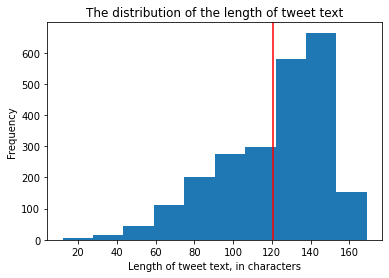

In [670]:
# display as a histogram
plt.hist(length)
plt.axvline(x=np.mean(length), c='r')
plt.xlabel('Length of tweet text, in characters')
plt.ylabel('Frequency')
plt.title('The distribution of the length of tweet text');

The average length of tweet text is around 120 characters.

### What is the dog that gets the highest rating (by @WeRateDogs), and the dog that gets the highest favorate count (by tweeters)?

In [671]:
# locate the dog which has the highest rating_numerator
max_rating_numerator = df_clean[df_clean.rating_numerator == df_clean.rating_numerator.max()]

In [672]:
# take a look
max_rating_numerator

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
860,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,4908,...,1.0,Bow_tie,0.5339,False,Sunglasses,0.0808,False,Sunglass,0.0508,False


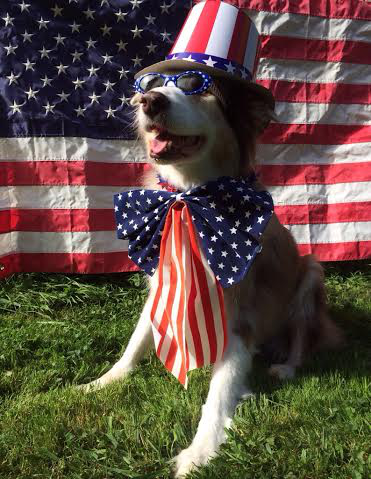

In [673]:
# see what the dog looks like
import requests
from PIL import Image
from io import BytesIO

image_url = max_rating_numerator['jpg_url'].values[0]
r = requests.get(image_url)
img = Image.open(BytesIO(r.content))
display(img)

Here is the number one rating given by @WeRateDogs

In [674]:
# locate the dog which has the max favorite_count
max_favorite_count = df_clean[df_clean.favorite_count == df_clean.favorite_count.max()]

In [675]:
# take a look
max_favorite_count

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
912,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,148987,...,1.0,Labrador_retriever,0.8253,True,Ice_bear,0.0447,False,Whippet,0.0184,True


In [676]:
# since the post provids a video instead of a picture, we will display a video 
# to see what the dog looks like
# from tweet_json.txt, search the json string that corresponds to the tweet_id above, 
# extract the video url and print it
from IPython.display import Video

with open('tweet_json.txt') as files:
    for json_str in files:
        tweet = json.loads(json_str)
        if tweet['id_str'] == '744234799360020481':
            video_url = tweet['extended_entities']['media'][0]['video_info']['variants'][0]['url']
            print(video_url)

https://video.twimg.com/ext_tw_video/744234667679821824/pu/vid/360x640/aLoem87jSUDyshiY.mp4


In [677]:
# copy the url above and paste as an src attribute in html
from IPython.display import HTML

HTML("""
    <video alt="video" controls>
        <source src="https://video.twimg.com/ext_tw_video/744234667679821824/pu/vid/360x640/aLoem87jSUDyshiY.mp4" type="video/mp4">
    </video>
""")

Here is the most favorite dog post at WeRateDogs given my tweeters

### What is the time most tweeter tweet?

In [678]:
# set the bin size
bins = [0, 6, 12, 18, 24]

# add custom labels
labels = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']

# add the bins to the dataframe
df_clean['time_bin'] = pd.cut(df_clean.timestamp.dt.hour, bins, labels=labels, right=False)

In [679]:
# take a look at the newly added column time_bin
df_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,time_bin
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,34709,...,Orange,0.0970,False,Bagel,0.0859,False,Banana,0.0761,False,12:00-17:59
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,30071,...,Chihuahua,0.3236,True,Pekinese,0.0906,True,Papillon,0.0690,True,00:00-05:59
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,22631,...,Chihuahua,0.7160,True,Malamute,0.0783,True,Kelpie,0.0314,True,00:00-05:59


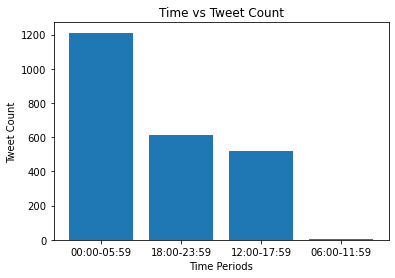

In [680]:
# groupby the time_bin, get the count, an sort the values
# display the count as a bar graph
time_count = df_clean.groupby('time_bin').size().sort_values(ascending=False)
plt.bar(time_count.index, time_count.values)
plt.title('Time vs Tweet Count')
plt.xlabel('Time Periods')
plt.ylabel('Tweet Count');

Based on this data, the time Tweeters tweet the most is between mid-night and 6am.

### Is there strong correlation between any two variables?

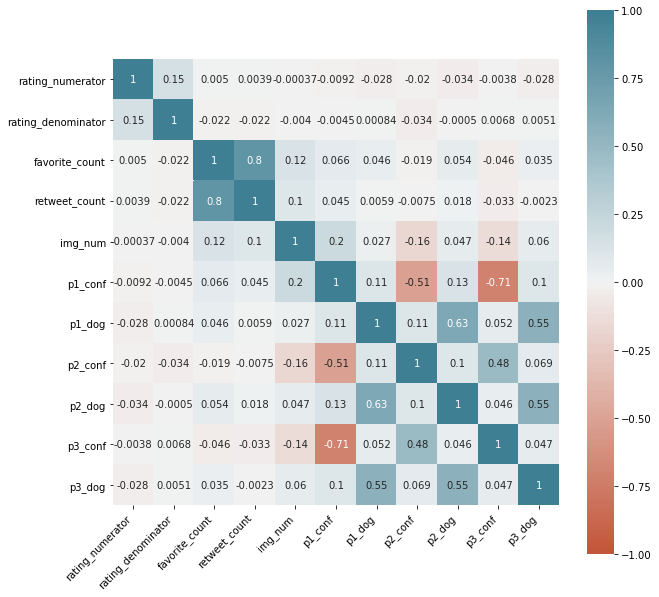

In [681]:
import seaborn as sns

corr = df_clean.corr()  # compute the correlation dataframe
plt.figure(figsize=(10, 10)) # set figure size

# display the heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

# set the x-axis tick labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.savefig('corr_matrix.png', dpi=600, bbox_inches='tight')

Since p1_dog, p2_dog, and p3_dog are not variables, they are predictions, therefore, there is no strong correlation between any two variables. So the answer is no.


### How accurate is the image prediction through the neural network?

In [682]:
# create a function to calculate the prediction rate
def get_true_rate():
    true_rate = []
    for b, p in [('p1_dog', 'p1_conf'), ('p2_dog', 'p2_conf'), ('p3_dog', 'p3_conf')]:
        mean = np.mean(df_clean[b] * df_clean[p])   # True/False * Confidence level
        true_rate.append(mean)
    weight = np.array([1.625, 1.25, 1.15])          # Assume the weight of each prediction
                                                    # in ratio 8:2:1   
    true_rate *= weight                             # scaled with the weight
#     print(true_rate)
    return np.mean(true_rate)                       # return the average prediction rate    

In [683]:
# The estimate accuracy of predicting whether a picture is a dog after 
# assuming the weights
get_true_rate()

0.30669963923745175

The estimate prediction rate for the neural network is around 30.67%.